In [1]:
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [2]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
        self.a = np.array([0.,0.])
    
    def CheckWallLimits(self,limits,dim=2):
        for i in range(dim):
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]
                
    # Method Force        
        
    def Force(self,p1,K,dim=2):
        
        tot_force= 0
        res= [0.,0.]
        norma= 0
        for i in range(dim):
            res[i]= (self.r[i]-p1.r[i])
            norma+= res[i]** 2
            
        norma= norma**0.5
        par= (norma)**3
        res= np.array(res)
        n_vector= res/norma
        if norma < p1.radius + self.radius and norma != 0 :
            tot_force= par * n_vector
        self.a= tot_force
        p1.a= -tot_force
        
                
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
                print(self.RrVector)

In [3]:
limits= np.array([20.,20.])
dt = 0.01
tmax = 10
t = np.arange(0,tmax+dt,dt)

In [4]:
def create_particles():
    r= 2.
    m= 1.
    x1= np.array([2.,2.])
    v1= np.array([20.,0.])
    a1= np.array([0.,0.])
    p1= Particle(x1,v1,a1,t,m,r,0)
    x2= np.array([-2.,2.])
    v2= np.array([0.,0.])
    p2= Particle(x2,v2,a1,t,m,r,1)
    x3= np.array([-15.,-15.])
    p3= Particle(x3,v2,a1,t,m,r,2)
    return [p1,p2,p3]


In [5]:
Particles= create_particles()

In [6]:
def simulation(Particles):
    
    K=100
    print(limits)
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            Particles[i].CheckWallLimits(limits,2)
            Particles[i].Evolution(it)
            for j in range(len(Particles)):
                if j != i :
                    Particles[i].Force(Particles[j],K)
        
    return Particles

In [7]:
a= simulation(Particles)

 54%|█████▍    | 540/1001 [00:00<00:00, 5342.81it/s]

[20. 20.]


100%|██████████| 1001/1001 [00:00<00:00, 5678.65it/s]


In [8]:
xd= Particles[0].GetPositionVector()
print(xd)

[[  2.    2. ]
 [  2.2   2. ]
 [  2.4   2. ]
 ...
 [-16.8   2. ]
 [-16.6   2. ]
 [-16.4   2. ]]


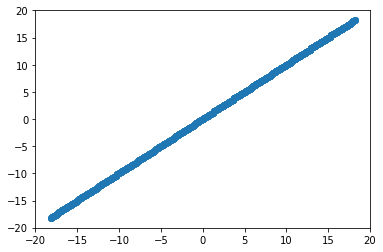

In [9]:
x= []
y= []
for i in range(len(xd)):
    x.append(xd[i][0])
    y.append(xd[i][0])
    
plt.figure()
plt.scatter(x,y)

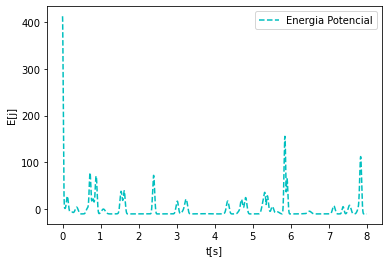

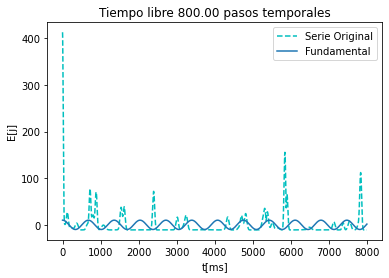

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EnergiaPotencialGas2D.txt"
data=pd.read_csv(url, delim_whitespace=True)
data=np.array(data)
x,y=data[:,0],data[:,1]
m=np.mean(y)
y=y-m

plt.figure()
plt.plot(x,y, "c--",label="Energia Potencial" )
plt.xlabel("t[s]")
plt.ylabel("E[j]")
plt.legend()

tf=abs(np.fft.rfft(y))

Npoints=len(tf)
freq=np.fft.fftfreq(Npoints)




filtro=freq<=0.005
tf[filtro]=0
ii=np.argmax(tf)

fun=freq[ii]

#grafica2
plt.figure()
x2=x*1000
y2=10*np.cos((fun)*x2)

plt.plot(x2,y, "c--",label="Serie Original")
plt.xlabel("t[ms]")
plt.ylabel("E[j]")
plt.plot(x2,y2,label="Fundamental")
plt.title("Tiempo libre 800.00 pasos temporales")
plt.legend()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data= np.loadtxt("derivada_central.txt")
plt.figure()
plt.plot(data[:,0],data[:,1])
